In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## datos de cáncer de mama de Wisconsin

In [2]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Series(breast_cancer.target, name='Diagnosis')

## Dividir los datos en conjuntos de entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Entrenar un modelo de regresión Lasso

In [4]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

## Predicciones

In [5]:
y_pred = lasso.predict(X_test)


## Error cuadrático

In [9]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadratico:", mse)

Error cuadratico: 0.07736364360388505


## Coeficientes

In [8]:
coef = pd.Series(lasso.coef_, index=X.columns)
print("Coeficientes:\n", coef)

Coeficientes:
 mean radius               -0.000000
mean texture              -0.000000
mean perimeter            -0.000000
mean area                  0.000176
mean smoothness           -0.000000
mean compactness          -0.000000
mean concavity            -0.000000
mean concave points       -0.000000
mean symmetry             -0.000000
mean fractal dimension    -0.000000
radius error              -0.000000
texture error             -0.000000
perimeter error           -0.000000
area error                 0.000000
smoothness error          -0.000000
compactness error         -0.000000
concavity error           -0.000000
concave points error      -0.000000
symmetry error            -0.000000
fractal dimension error   -0.000000
worst radius              -0.000000
worst texture             -0.002087
worst perimeter           -0.012434
worst area                 0.000000
worst smoothness          -0.000000
worst compactness         -0.000000
worst concavity           -0.000000
worst concave

## Grafico

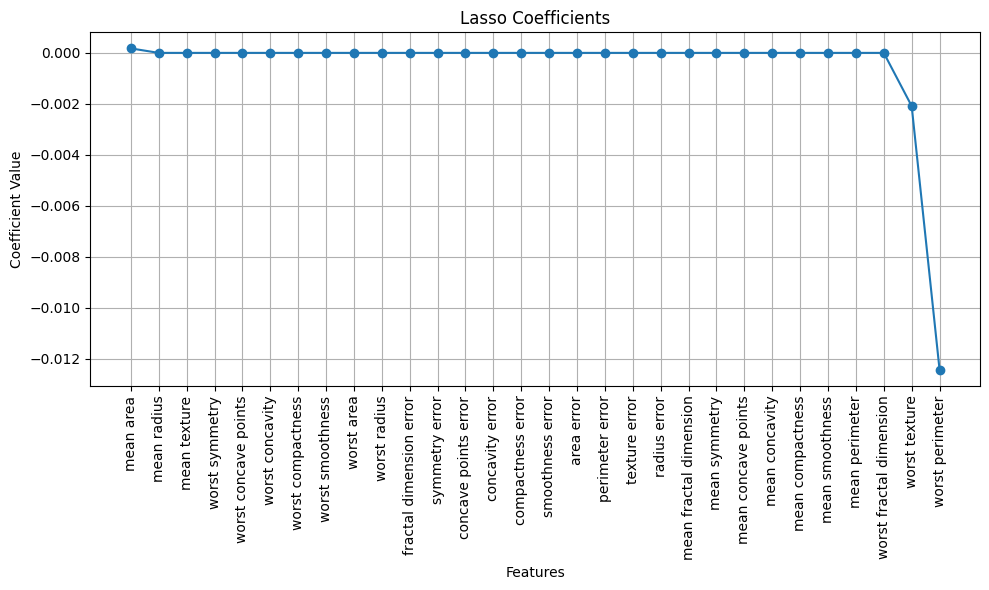

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(coef.sort_values(ascending=False), marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Lasso Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()